## Predictive modeling - Linear Regression model (Daily mean tempreture)

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.formula.api as smf

In [113]:
kandy_weather = pd.read_csv('../data/processed/kandy_weather_cleaned.csv', index_col=0, parse_dates=['time'])

In [114]:
#drop highly correlated columns 
kandy_weather = kandy_weather.drop(columns=['max_temperature', 'min_temperature', 'apparent_temperature_mean'])

In [115]:
# Chronological split for temporal data: train/val/test = 70/15/15
# Ensure data is sorted by time (if `time` column exists), otherwise by index
# if 'time' in kandy_weather.columns:
#     kandy_weather_sorted = kandy_weather.sort_values('time')
# else:
#     kandy_weather_sorted = kandy_weather.sort_index()

# Define features and target
variables = ['weathercode', 'shortwave_radiation', 'rainfall', 'max_wind_speed', 'max_wind_gust', 'dominant_Wind_Direction', 'evapotranspiration', 'mean_temperature', 'rain_tomorrow']
target = 'mean_temperature'

x = kandy_weather.drop(columns=[target])
y = kandy_weather[target]

train_set = kandy_weather[kandy_weather['year'] <= 2018]
validation_set = kandy_weather[kandy_weather['year'] == 2019]
test_set = kandy_weather[kandy_weather['year'] >= 2020]

train_end = len(train_set)
val_end = train_end + len(validation_set)

x_train, y_train = x.iloc[:train_end], y.iloc[:train_end]
x_val, y_val = x.iloc[train_end:val_end], y.iloc[train_end:val_end]
x_test, y_test = x.iloc[val_end:], y.iloc[val_end:]




In [116]:
# # Define features and target variables
# variables = ['weather_code', 'shortwave_radiation', 'rainfall', 'max_wind_speed', 'max_wind_gust', 'dominant_Wind_Direction', 'evapotranspiration', 'mean_temperature', 'rain_tomorrow']
# target = 'mean_temperature'

# x = kandy_weather.drop(columns=[target])
# y = kandy_weather[target]


# # # Chronological split for temporal data: train/val/test = 70/15/15
# # # Ensure data is sorted by time (if `time` column exists), otherwise by index
# # if 'time' in kandy_weather.columns:
# #     kandy_weather_sorted = kandy_weather.sort_values('time')
# # else:
# #     kandy_weather_sorted = kandy_weather.sort_index()

# # Define features and target
# variables = ['weather_code', 'shortwave_radiation', 'rainfall', 'max_wind_speed', 'max_wind_gust', 'dominant_Wind_Direction', 'evapotranspiration', 'mean_temperature', 'rain_tomorrow']
# target = 'mean_temperature'


# n_samples = len(kandy_weather_sorted)
# train_end = int(n_samples * 0.70)
# val_end = int(n_samples * 0.85)

# x_train, y_train = x.iloc[:train_end], y.iloc[:train_end]
# x_val, y_val = x.iloc[train_end:val_end], y.iloc[train_end:val_end]
# x_test, y_test = x.iloc[val_end:], y.iloc[val_end:]

# # Quick sanity check of sizes
# print({'train': len(x_train), 'val': len(x_val), 'test': len(x_test), 'total': n_samples})

In [117]:
# Fit the model
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [118]:
# --- Get feature names from the X_train DataFrame ---
feature_names = x_train.columns

# --- Extract coefficients and intercept from the model ---
coefficients = model.coef_
intercept = model.intercept_

# --- Create a DataFrame for coefficients ---
coef_table = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# --- Add intercept as a separate row (optional) ---
intercept_row = pd.DataFrame({
    'Feature': ['Intercept'],
    'Coefficient': [intercept]
})

# --- Combine intercept and coefficients ---
coef_table = pd.concat([intercept_row, coef_table], ignore_index=True)

# --- Display the table ---
print(coef_table)

                    Feature  Coefficient
0                 Intercept   -27.108480
1               weathercode     0.014603
2       shortwave_radiation    -0.598509
3                  rainfall    -0.006886
4            max_wind_speed    -0.053304
5             max_wind_gust     0.024080
6   dominant_Wind_Direction     0.002260
7        evapotranspiration     3.789659
8             rain_tomorrow     0.428598
9                      year     0.023061
10                    month    -0.015433
11                      day     0.000626


In [119]:
def evaluate_model(model, X, y, dataset_name):
    """Evaluate model performance"""
    predictions = model.predict(X)
    
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, predictions)
    r2 = r2_score(y, predictions)
    
    print(f"\n{dataset_name} Set Performance:")
    print(f"  RMSE: {rmse:.4f}°C")
    print(f"  MAE:  {mae:.4f}°C")
    print(f"  R²:   {r2:.4f}")
    
    return predictions, {'RMSE': rmse, 'MAE': mae, 'R2': r2}

# Evaluate on all sets
train_pred, train_metrics = evaluate_model(lr_model, x_train, y_train, "Training")
val_pred, val_metrics = evaluate_model(lr_model, x_val, y_val, "Validation")
test_pred, test_metrics = evaluate_model(lr_model, x_test, y_test, "Test")


Training Set Performance:
  RMSE: 0.5861°C
  MAE:  0.4348°C
  R²:   0.7449

Validation Set Performance:
  RMSE: 0.5593°C
  MAE:  0.4236°C
  R²:   0.7980

Test Set Performance:
  RMSE: 0.6106°C
  MAE:  0.4665°C
  R²:   0.7048


In [120]:
# Define features and target
variables = ['weather_code', 'shortwave_radiation', 'rainfall', 'max_wind_speed', 'max_wind_gust', 'dominant_Wind_Direction', 'evapotranspiration', 'mean_temperature', 'rain_tomorrow']
target = 'mean_temperature'

x = kandy_weather.drop(columns=[target])
y = kandy_weather[target]

train_set = kandy_weather[kandy_weather['year'] <= 2018]
validation_set = kandy_weather[kandy_weather['year'] == 2019]
test_set = kandy_weather[kandy_weather['year'] >= 2020]

train_end = len(train_set)
val_end = train_end + len(validation_set)

x_train, y_train = x.iloc[:train_end], y.iloc[:train_end]
x_val, y_val = x.iloc[train_end:val_end], y.iloc[train_end:val_end]
x_test, y_test = x.iloc[val_end:], y.iloc[val_end:]


pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('lr_model', LinearRegression())
])

pipeline.fit(x_train, y_train)


,steps,"[('scaler', ...), ('lr_model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [121]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = pipeline.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # manual RMSE
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)



RMSE: 0.6105872847990867
R²: 0.704830851596477


In [122]:
sample = x_test.iloc[0:1]   # take one day’s weather features
pred_temp = lr_model.predict(sample)
print("Predicted mean temperature:", pred_temp[0])

Predicted mean temperature: 23.59176084608987


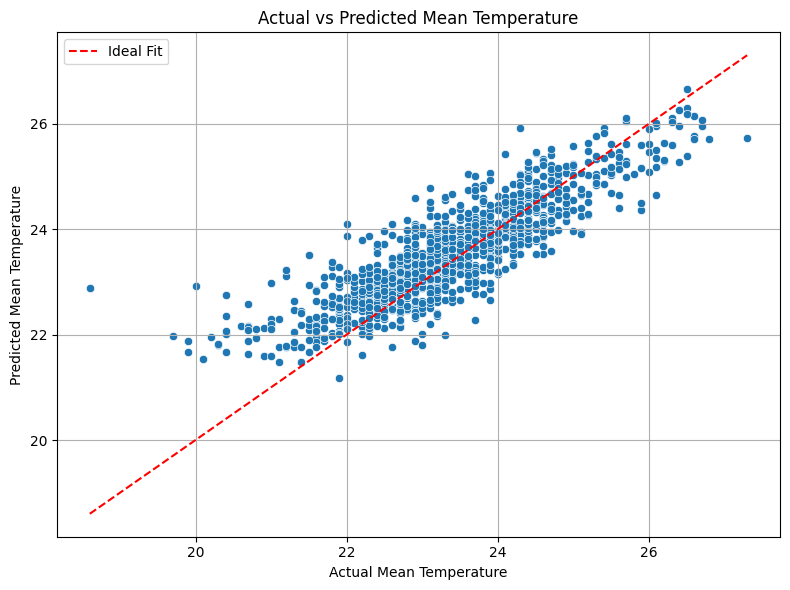

In [123]:
# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Mean Temperature')
plt.ylabel('Predicted Mean Temperature')
plt.title('Actual vs Predicted Mean Temperature')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [134]:
# --- Combine training data for statsmodels ---
train_data = x_train.copy()
train_data['mean_temperature'] = y_train

# --- Build the regression formula ---
formula = "mean_temperature ~ weathercode + shortwave_radiation + rainfall + max_wind_speed + max_wind_gust + dominant_Wind_Direction + evapotranspiration + rain_tomorrow"

# --- Fit the OLS regression model ---
model = smf.ols(formula=formula, data=train_data).fit()

# --- Print full model summary ---
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       mean_temperature   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     1170.
Date:                Tue, 16 Sep 2025   Prob (F-statistic):               0.00
Time:                        20:52:14   Log-Likelihood:                -2935.3
No. Observations:                3287   AIC:                             5889.
Df Residuals:                    3278   BIC:                             5943.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

## Residuals Analysis

In [125]:
residuals = y_test - y_pred

In [126]:
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(residuals)
print(f"Durbin–Watson Statistic: {dw_stat:.4f}")

Durbin–Watson Statistic: 0.6116


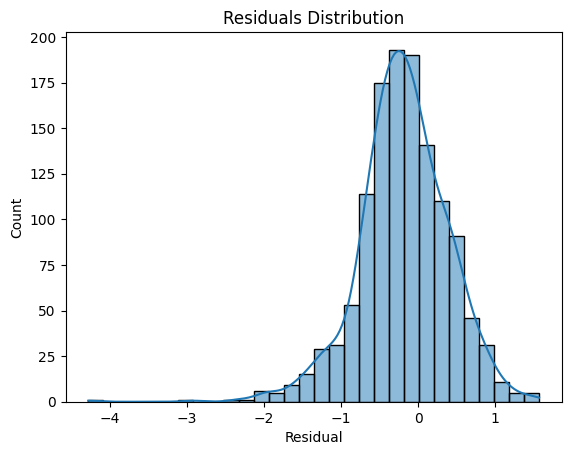

In [127]:
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residual")
plt.show()


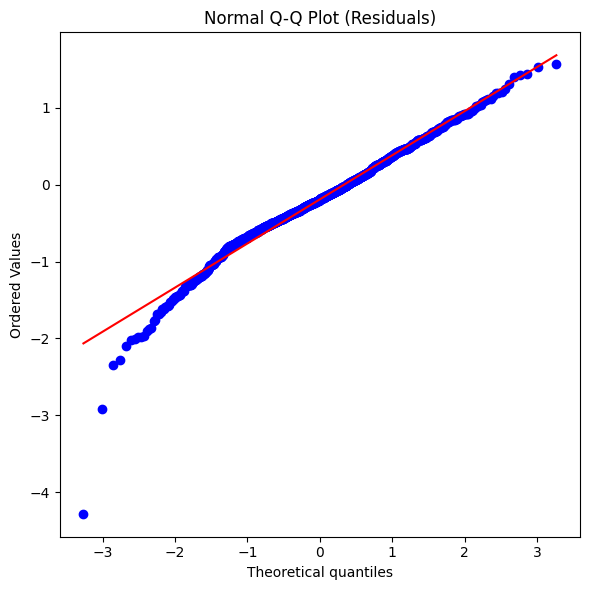

In [128]:
from scipy.stats import probplot

plt.figure(figsize=(6, 6))
probplot(residuals, dist="norm", plot=plt)
plt.title('Normal Q-Q Plot (Residuals)')
plt.tight_layout()
plt.show()

In [129]:
from scipy.stats import shapiro
stat, p = shapiro(residuals)
print("Shapiro-Wilk Test: stat=%.3f, p=%.3f" % (stat, p))

Shapiro-Wilk Test: stat=0.976, p=0.000


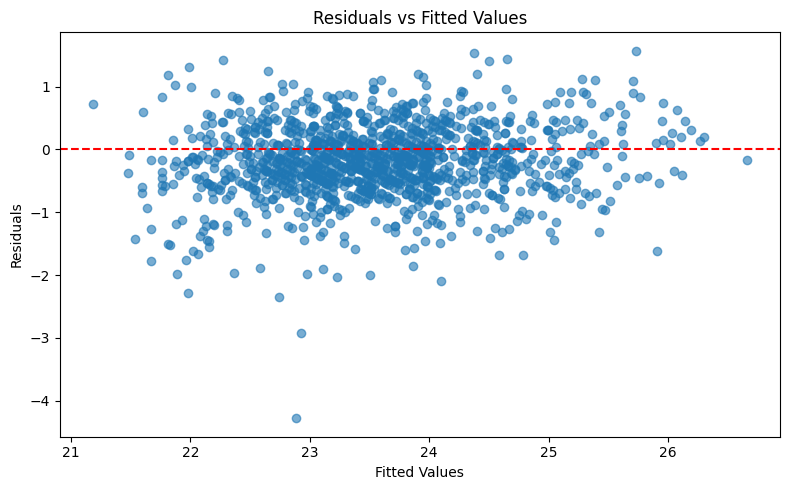

In [130]:
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.tight_layout()
plt.show()

Observations from your plot:

1.Centered around zero

    The residuals are scattered around the red line (y=0).

    This means your model is unbiased on average (no strong systematic under/over prediction). ✅

2.Spread of residuals

    The variance of residuals looks fairly constant across fitted values (between ~21 and 26).

    There is no strong funnel shape (e.g., narrow on one side, wide on the other).

    This suggests homoscedasticity (constant variance) is likely satisfied. ✅

3.No clear pattern

    Residuals don’t form curves or trends.

    If you saw a U-shape or wave-like structure, it would mean your linear model is missing some nonlinearity.

    Here, the scatter looks random → linearity assumption holds. ✅

4.Outliers

    A few points fall far below (e.g., residuals < -3).

    These are potential outliers that may influence the model. ⚠️

In [131]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Requires residuals & design matrix
import statsmodels.api as sm
exog = sm.add_constant(x_test)  # add intercept
bp_test = het_breuschpagan(residuals, exog)

print("\n--- Breusch-Pagan Test ---")
print(f"Test Statistic: {bp_test[0]:.4f}")
print(f"p-value       : {bp_test[1]:.4f}")



--- Breusch-Pagan Test ---
Test Statistic: 103.9662
p-value       : 0.0000


In [135]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Predictor columns
X = train_data[['weathercode', 'shortwave_radiation', 'rainfall', 'max_wind_speed',
                'max_wind_gust', 'dominant_Wind_Direction', 'evapotranspiration', 'rain_tomorrow']]

# Calculate VIF
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                   Feature         VIF
0              weathercode    8.268479
1      shortwave_radiation  634.944988
2                 rainfall    1.580911
3           max_wind_speed   74.542097
4            max_wind_gust  108.096322
5  dominant_Wind_Direction    5.852512
6       evapotranspiration  586.736360
7            rain_tomorrow    7.191347
